Notebook do uczenia sieci

In [68]:
# Import Bibliotek
import tensorflow as tf
import numpy as np
import pathlib

In [69]:
# Definicja zmiennych
model_name = "nazwa2.keras"

batch_size = 32
img_height = 256
img_width = 256

data_dir = pathlib.Path("data")

num_classes = 2

In [70]:
# Ładowanie datasetu do nauki sieci
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=123,
  validation_split=0.2,
  subset="training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7553 files belonging to 2 classes.
Using 6043 files for training.


In [71]:
# Ładowanie datasetu do walidacji 
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7553 files belonging to 2 classes.
Using 1510 files for validation.


['with_mask', 'without_mask']


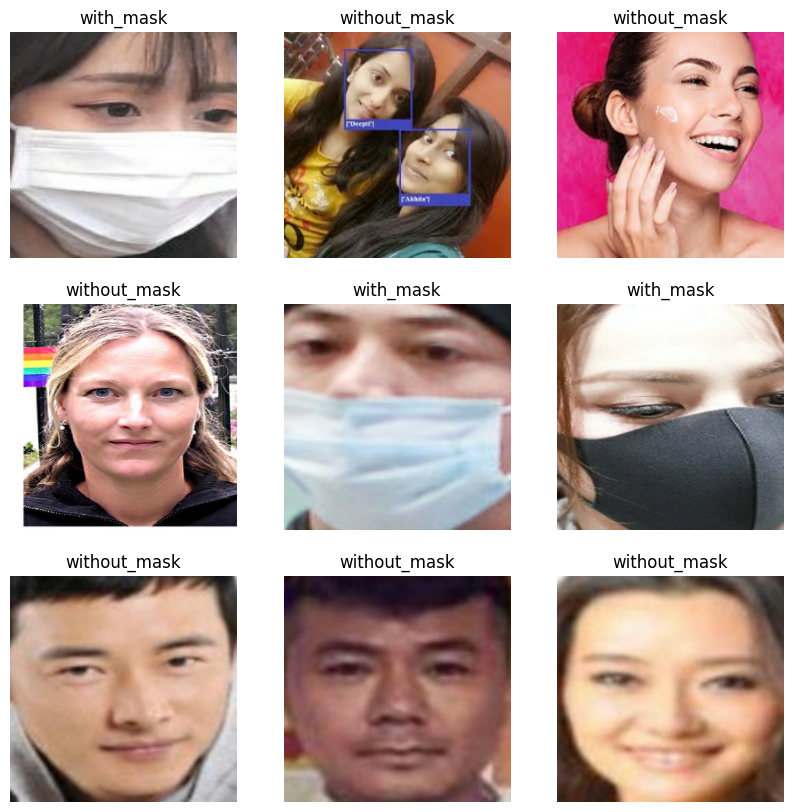

In [72]:
# Wyświetlenie przykładowych danych
import matplotlib.pyplot as plt

class_names = train_ds.class_names
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [73]:
AUTOTUNE = tf.data.AUTOTUNE

test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [74]:
# Model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    
    tf.keras.layers.Conv2D(8, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),

    tf.keras.layers.Dense(2, activation='softmax')
])

In [75]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

In [76]:
model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=10,
  verbose=1,
)

Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.7879 - loss: 0.4151 - val_accuracy: 0.9166 - val_loss: 0.2148
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.9141 - loss: 0.2157 - val_accuracy: 0.9424 - val_loss: 0.1678
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.9447 - loss: 0.1631 - val_accuracy: 0.9437 - val_loss: 0.1458
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.9464 - loss: 0.1399 - val_accuracy: 0.9483 - val_loss: 0.1327
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.9654 - loss: 0.1006 - val_accuracy: 0.9563 - val_loss: 0.1331
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.9741 - loss: 0.0831 - val_accuracy: 0.9603 - val_loss: 0.1296
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.9826 - loss: 0.0565 - val_accuracy: 0.9596 - val_loss: 0.1411
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.9906 - loss: 0.0300 - 

In [77]:
test_loss, test_accuracy = model.evaluate(test_ds)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9324 - loss: 0.4087


In [78]:
model.save("models/"+model_name)
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 256, 256, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 128, 128, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │     1,048,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,225,944 (12.31 MB)

 Trainable params: 1,075,314 (4.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,150,630 (8.20 MB)

In [79]:
# Załadowanie modelu
model = tf.keras.models.load_model("models/"+model_name)
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 256, 256, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 128, 128, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │     1,048,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,225,944 (12.31 MB)

 Trainable params: 1,075,314 (4.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,150,630 (8.20 MB)

In [80]:
img_path = 'Testy/No Mask/No Mask/'
good_am_mask = 0
good_am_nomask = 0
all_mask = 0
all_nomask = 0
for i in range(1, 131):
    img = img_path + 'No Mask'+ str(i) +'.jpg'
    img = tf.keras.utils.load_img(img, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    predictions = model.predict(img_array, verbose=0)
    score = tf.nn.softmax(predictions[0])
    good_am_nomask = good_am_nomask + np.argmax(score)
    all_nomask = all_nomask + 1

img_path = 'Testy/Mask/Mask/'
good_am = 0
all = 0
for i in range(1, 208):
    img = img_path + 'Mask'+ str(i) +'.jpg'
    img = tf.keras.utils.load_img(img, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    predictions = model.predict(img_array, verbose=0)
    score = tf.nn.softmax(predictions[0])
    good_am_mask = good_am_mask + (1 - np.argmax(score))
    all_mask = all_mask + 1

print(f"No mask -> {good_am_nomask} / {all_nomask} = {(good_am_nomask/all_nomask * 100):.2f}%")
print(f"Mask -> {good_am_mask} / {all_mask} = {(good_am_mask/all_mask * 100):.2f}%")

No mask -> 123 / 130 = 94.62%
Mask -> 161 / 207 = 77.78%
